<a href="https://colab.research.google.com/github/eliot28/desafioLatam/blob/main/Tutoria_3_python_estadistica_g80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

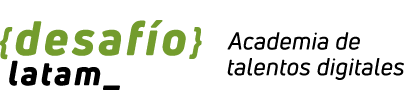



#<center><strong><font color="green">Distribución normal</font></strong></center>

##<strong><font color="green">Modelando con la distribución normal</font></strong>
Veremos como la distribución normal permite modelar algunos conjuntos de datos. Para ello necesitaremos importar algunas librerías y un conjunto de datos

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

dataset = pd.read_csv('height_weight.csv')

In [3]:
dataset.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
dataset.count()


Gender    10000
Height    10000
Weight    10000
dtype: int64

El dataset contiene los datos de genero, estatura (en pulgadas) y peso (en libras) de 10000 personas. Veremos algunos indicadores para la altura.

In [3]:
dataset['Height'].dropna().describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

Si construimos un histograma de los datos obtenemos lo siguiente:

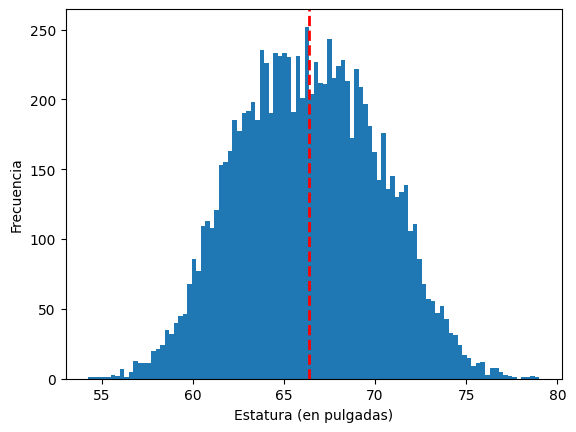

In [9]:
alturas=dataset['Height'].dropna()
media=np.mean(alturas)
plt.hist(alturas, bins=100)
plt.axvline(x=media, color='red', linestyle='dashed', linewidth=2, label='Media')
plt.xlabel('Estatura (en pulgadas)')
plt.ylabel('Frecuencia')
plt.show()

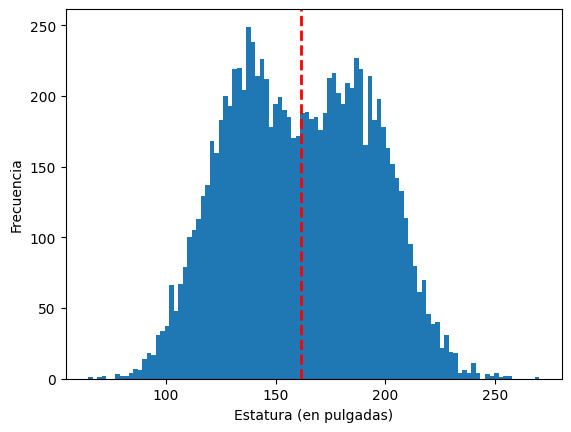

In [10]:
peso=dataset['Weight'].dropna()
media=np.mean(peso)
plt.hist(peso, bins=100)
plt.axvline(x=media, color='red', linestyle='dashed', linewidth=2, label='Media')
plt.xlabel('Estatura (en pulgadas)')
plt.ylabel('Frecuencia')
plt.show()

Podemos observar que la distribución de los datos es bastante simétrica respecto de la media.

- ¿Cómo podríamos calcular la probabilidad de que una persona escogida al azar mida 70 pulgadas o menos?



Veremos ahora como un modelo de distribucion normal puede ayudarnos a modelar esta situación.

In [11]:
#Calculamos la media y la desviación estándar de los datos, además de los valores máximo y mínimo para graficar.
mu=alturas.mean()
sigma=alturas.std()
minimo=alturas.min()
maximo=alturas.max()

#Creamos un arreglo de valores equidistantes entre los valores mínimo y máximo, utilizando linspace
x = np.linspace(minimo, maximo)
x

array([54.26313333, 54.76794167, 55.27275002, 55.77755837, 56.28236671,
       56.78717506, 57.29198341, 57.79679176, 58.3016001 , 58.80640845,
       59.3112168 , 59.81602515, 60.32083349, 60.82564184, 61.33045019,
       61.83525854, 62.34006688, 62.84487523, 63.34968358, 63.85449193,
       64.35930027, 64.86410862, 65.36891697, 65.87372531, 66.37853366,
       66.88334201, 67.38815036, 67.8929587 , 68.39776705, 68.9025754 ,
       69.40738375, 69.91219209, 70.41700044, 70.92180879, 71.42661714,
       71.93142548, 72.43623383, 72.94104218, 73.44585053, 73.95065887,
       74.45546722, 74.96027557, 75.46508391, 75.96989226, 76.47470061,
       76.97950896, 77.4843173 , 77.98912565, 78.493934  , 78.99874235])

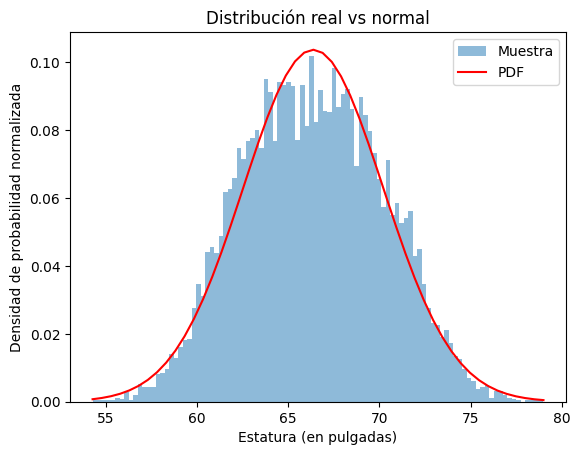

In [12]:
#Creamos una función, llamada pdf, que calcula el valor de la función de distribución de probabilidad normal, con los parámetros dados
# Notemos que "sigma" funciona como "escala"
pdf = norm.pdf(x, loc=mu, scale=sigma)


# Histograma de los datos. El parámetro "density=True" va a construir el histograma haciendo que la suma de todas las áreas de las barras sea igual a 1, para que podamos representar las probabilidades
plt.hist(alturas, bins=100, density=True, alpha=0.5, label='Muestra')#alpha=0.5 da un 50% de transparencia

plt.plot(x, pdf, color='red', label='PDF') #Graficamos la distribución normal
plt.xlabel('Estatura (en pulgadas)')
plt.ylabel('Densidad de probabilidad normalizada')
plt.title('Distribución real vs normal')
plt.legend()
plt.show()


¿Y si comparamos ahora los pesos, para hombres y mujeres por separado? Vamos a extraer los datos

In [13]:
hombres=dataset[dataset['Gender']=='Male']['Weight']
mujeres=dataset[dataset['Gender']=='Female']['Weight']

Definiremos ahora una función que nos permita modelar un conjunto de datos con a distribución normal

In [14]:
def get_psd(x):
  mu=x.mean()
  sigma=x.std()
  minimo=x.min()
  maximo=x.max()
  x = np.linspace(minimo, maximo)
  pdf = norm.pdf(x, loc=mu, scale=sigma)
  return(x,pdf)



Con esto, ya podemos hacer nuestra comparación

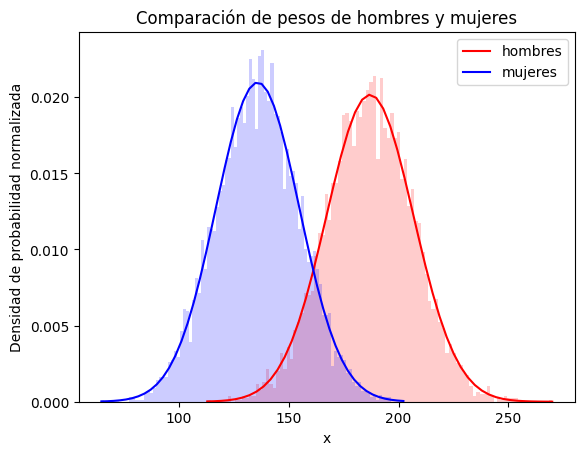

In [15]:
# hombre
x,pdf=get_psd(hombres)
plt.plot(x , pdf, color='red', label='hombres') ## implimo la destribucion normal estimada desde los parametros
# mujeres
x,pdf=get_psd(mujeres)
plt.plot(x , pdf, color='blue', label='mujeres') ## imprimo la distribución normal estimada desde los parametros

plt.hist(hombres, bins=100, density=True, alpha=0.2, color='red')
plt.hist(mujeres, bins=100, density=True, alpha=0.2, color='blue')

plt.xlabel('x')
plt.ylabel('Densidad de probabilidad normalizada')
plt.title('Comparación de pesos de hombres y mujeres')
plt.legend()
plt.show()

##<strong><font color="green">Parámetros la distribución normal</font></strong>

¿Cuál puede ser la importancia de los parámetros de una distribución normal? Como hemos mencionado, la media de los datos constituye un **eje de simetria** de la curva. Mientras mayor sea esta media, este eje estará más desplazado hacia la derecha. En el gráfico anterior puedes ver que el promedio para los hombres es mayor, lo que hace que el gráfico esté desplazado hacia la derecha en comparación al de las mujeres.

Para analizar el rol que cumple la desviación estándar, veremos algunos ejemplos de distribuciones normales con la misma media pero diferentes desviaciones.

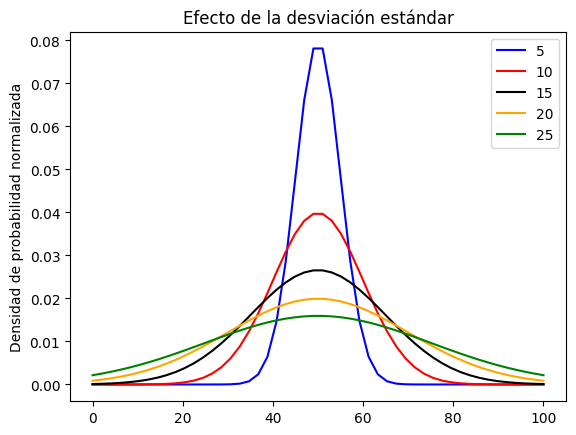

In [9]:
x = np.linspace(0, 100)# consideraremos un rango de valores entre 0 y 100

desv={5:'blue',
      10:'red',
      15:'black',
      20:'orange',
      25:'green'}

for clave,valor in desv.items():
  pdf = norm.pdf(x, loc=50, scale=clave)
  plt.plot(x, pdf, color=valor, label=clave)

plt.ylabel('Densidad de probabilidad normalizada')
plt.title('Efecto de la desviación estándar')
plt.legend()
plt.show()

¿Qué ocurre cuando aumenta el valor de sigma?

##<strong><font color="green">Aplicación la distribución normal</font></strong>

COnsiderando el modelamiento anterior, vamos a comparar los resuktados "reales" (es decir, considerando la lista de datos) con lo que predice un modelo basado en la distribución normal. Específicamente, nos preguntaremos ¿cuál es la probabilidad de que una persona al azar mida 72 pulgadas o menos?

Nuestra primera alternativa es determinar a qué percentil corresponde 72 en el conjunto de datos. Para esto necesitaremos cargar una librería.


In [16]:
from scipy.stats import percentileofscore

print(percentileofscore(alturas, 72)) ## es la probabilidad


92.71000000000001


In [19]:
np.percentile(alturas,72)  ## es el valor donde esta el 72% de los datos

68.83736161875345

Es decir, un 92,7% de las personas de la muestra mide 72 puldadas o menos. O, lo que es igual, la probabilidad de escoger a una persona al azar que mida 72 pulgadas o menos es 0,927, aproximadamente.

¿Qué ocurre si consideramos la función normal definida por el promedio y la desviación estándar de los datos?

In [20]:

mu = np.mean(alturas)
sigma = np.std(alturas)

# Valor específico para el cual queremos calcular la probabilidad
valor = 72

# Calcular la probabilidad acumulada
probabilidad = norm.cdf(valor, loc=mu, scale=sigma)

print("La probabilidad de obtener un valor menor o igual a", valor, "es:", probabilidad)


La probabilidad de obtener un valor menor o igual a 72 es: 0.9284009209133961


In [21]:
mujeres.info()

<class 'pandas.core.series.Series'>
Index: 5000 entries, 5000 to 9999
Series name: Weight
Non-Null Count  Dtype  
--------------  -----  
5000 non-null   float64
dtypes: float64(1)
memory usage: 78.1 KB


In [24]:
mujeres.describe()

count    5000.000000
mean      135.860093
std        19.022468
min        64.700127
25%       122.934096
50%       136.117583
75%       148.810926
max       202.237214
Name: Weight, dtype: float64

¡Prueba con otros valores!

In [ ]:
resultados = []
for i in range(1000):
  resultados.append(modelo.binomial())

resultados